Name : Kartik Joshi 

SUID: 842414814



This code performs below mentioned functionality 

1. Implement degree, closeness, betweenness and eigenvector centrality in python. Your functions should take as input an adjacency matrix and return a list or vector of centrality values. You may focus on just undirected graphs. Do not simply invoke NetworkX functions.
2. Create a function that takes as input an adjacency matrix and plots in the notebook a depiction of the associated graph with eigenvector centrality represented by node size. Nodes should be represented as circles.

In [37]:
## Part 1

# Import all packages 
import numpy as np

## this code is to take input from user 
# size = int(input("Please enter number of nodes in graph"))
# print("Enter adjeceny matrix value one by one, row increasing order")
# Inx = [[int(input("Enter number: ")) for i in range(size)] for j in range(size)]

# this code is for default matrix 
size = 9
input_matrix = np.matrix([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])
Final_Result = []

def Cal_Degree(input_matrix):
    temp= []
    for i in range(0,len(input_matrix)):
        x = 0 
        for j in range(0,len(input_matrix)):
            x += input_matrix[i,j]
        temp.append(x/(size-1))
    return temp


    
# Define sigma metrix to calculate sigma values for each node. Also define matrix to store shortest paths 
A_powers = [np.linalg.matrix_power(input_matrix,m) for m in range(1,size+1)]
min_lengths = np.zeros((size,size))
sigma = np.zeros((size,size))
sigma
for i in range(size):
    for j in range(size):
        for x in range(size):
            X = A_powers[x].copy()
            if X[i,j] > 0 and i != j:
                sigma[i,j] = X[i,j]
                min_lengths[i,j] = x + 1
                break
        
def Closeness(input_matrix):
    temp= []
    min_lengths = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            for x in range(size):
                X = A_powers[x].copy()
                if X[i,j] > 0 and i != j:
                    min_lengths[i,j] = x + 1
                    break
    for i in range(0,len(min_lengths)):
        x = 0 
        for j in range(0,len(min_lengths)):
            x += min_lengths[i,j]
        temp.append((size-1)/x)
    return temp

    
def sigma_through_jay(j):
    # Number of shortest paths through node j
    B = np.array(input_matrix.copy())
    B[j] = np.zeros(size)
    B[:,j] = np.zeros(size)
    B_powers = [np.linalg.matrix_power(B,m) for m in range(1,size+1)]
    B_sigma = np.zeros((size,size))
    B_min_lengths = np.zeros((size,size))
    for i in range(9):
        for k in range(9):
            if i != k:
                X = B_powers[int(min_lengths[i,k]-1)]
                B_sigma[i,k] = X[i,k]
    return (sigma - B_sigma) 

def betweenness(j):
    # Finally, the betweenness
    sigst = sigma_through_jay(j)
    total = 0
    for i in range(9):
        for k in range(i):
            if i != j and k != j:
                total += sigst[i,k] / sigma[i,k]
    # We return a single number.
    return total

def Betweenness(input_matrix):
    # Finally, the betweenness
    btwn_values = [betweenness(x) for x in range(9)]
    return btwn_values
    # We return a single number.


def Eigenvalue(input_matrix):
    temp= []
    eigenValues, eigenVectors = np.linalg.eig(input_matrix)
    value = np.amax(eigenValues)
    ind = np.where(eigenValues==value)
    index = ind[0][0]
    for i in range(0,size):
        tmp = eigenVectors[i]
        temp.append(abs(tmp[0,index]))
    return temp
    
    
Final_Result.append(Cal_Degree(input_matrix))
Final_Result.append(Closeness(input_matrix))
Final_Result.append(Betweenness(input_matrix))
Final_Result.append(Eigenvalue(input_matrix))


##Final result contains for vectors for each function call result




[[0.375, 0.25, 0.375, 0.5, 0.5, 0.5, 0.5, 0.375, 0.125], [0.47058823529411764, 0.34782608695652173, 0.47058823529411764, 0.61538461538461542, 0.61538461538461542, 0.61538461538461542, 0.5, 0.47058823529411764, 0.34782608695652173], [3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0], [0.19574879570918419, 0.1116837032398663, 0.19574879570918396, 0.37874802533567853, 0.46808547631042252, 0.46808547631042252, 0.40997938953295338, 0.3840203838411051, 0.11695606174529273]]


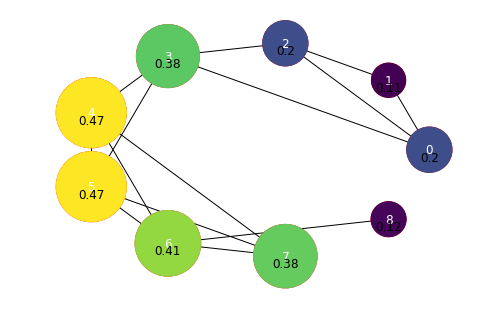

In [45]:
# Part 2

import numpy as np
import sys, networkx as nx, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


## this code is to take input from user 
# size = int(input("Please enter number of nodes in graph"))
# print("Enter adjeceny matrix value one by one, row increasing order")
# Inx = [[int(input("Enter number: ")) for i in range(size)] for j in range(size)]

# this code is for default matrix 
size = 9
input_matrix = np.matrix([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])
Final_Result = []
H = nx.from_numpy_matrix(input_matrix)

def Eigenvalue(input_matrix):
    temp= []
    eigenValues, eigenVectors = np.linalg.eig(input_matrix)
    value = np.amax(eigenValues)
    ind = np.where(eigenValues==value)
    index = ind[0][0]
    for i in range(0,size):
        tmp = eigenVectors[i]
        temp.append(abs(tmp[0,index]))
    Final_Result.append(temp)

Eigenvalue(input_matrix)


temp=Final_Result[0].copy()
node_sizes = []
labels = []
nodes = [i for i in range(0,9)]
for i in range(0,size):
    node_sizes.append(10500 * temp[i])
    labels.append('\n' + str(round(temp[i],2)))

Final_Labels= dict(zip(nodes,labels))

# Connect each node to its successor
pos=nx.shell_layout(H)
nx.draw(H, pos, node_size = node_sizes, with_labels = True,font_color="white")
nx.draw_networkx_labels(H, pos, labels = Final_Labels)
nc = nx.draw_networkx_nodes(H, pos, node_size = node_sizes, node_color=list(temp),cmap='viridis',font_color="white")
plt.show()